## EE634 HW2 
### Kutay Ugurlu 2232841

In [209]:

import numpy as np 
from numpy.linalg import eig
from matplotlib import pyplot as plt 
from scipy.linalg import hadamard
from skimage.color import rgb2gray
from scipy.fft import fft, ifft, fft2, ifft2, dct, dctn
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

# Q1

## a

In [210]:
def Hadamard_doubler(H):
    H_double_first_row = np.hstack((H,H))
    H_double_second_row = np.hstack((H,-1*H))
    return 1/np.sqrt(2) * np.vstack((H_double_first_row,H_double_second_row))

def HadamardMtx(N:int):
    H = 1/np.sqrt(2) * np.array([[1,1],[1,-1]])
    for _ in range(1,N):
        H = Hadamard_doubler(H)
    return H
    

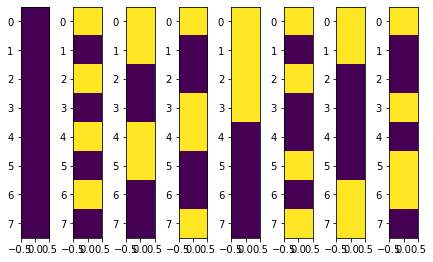

In [211]:
I = np.eye(8)
A = HadamardMtx(3)
B = np.empty(A.shape)
for i in range(8):
    basis_vector = I[:,i]
    transformed_basis_vec = np.expand_dims(A.dot(basis_vector),-1)
    
    plt.subplot(1,8,i+1)
    plt.imshow(transformed_basis_vec)
    B[:,i] = A.dot(basis_vector)

plt.tight_layout()

## b

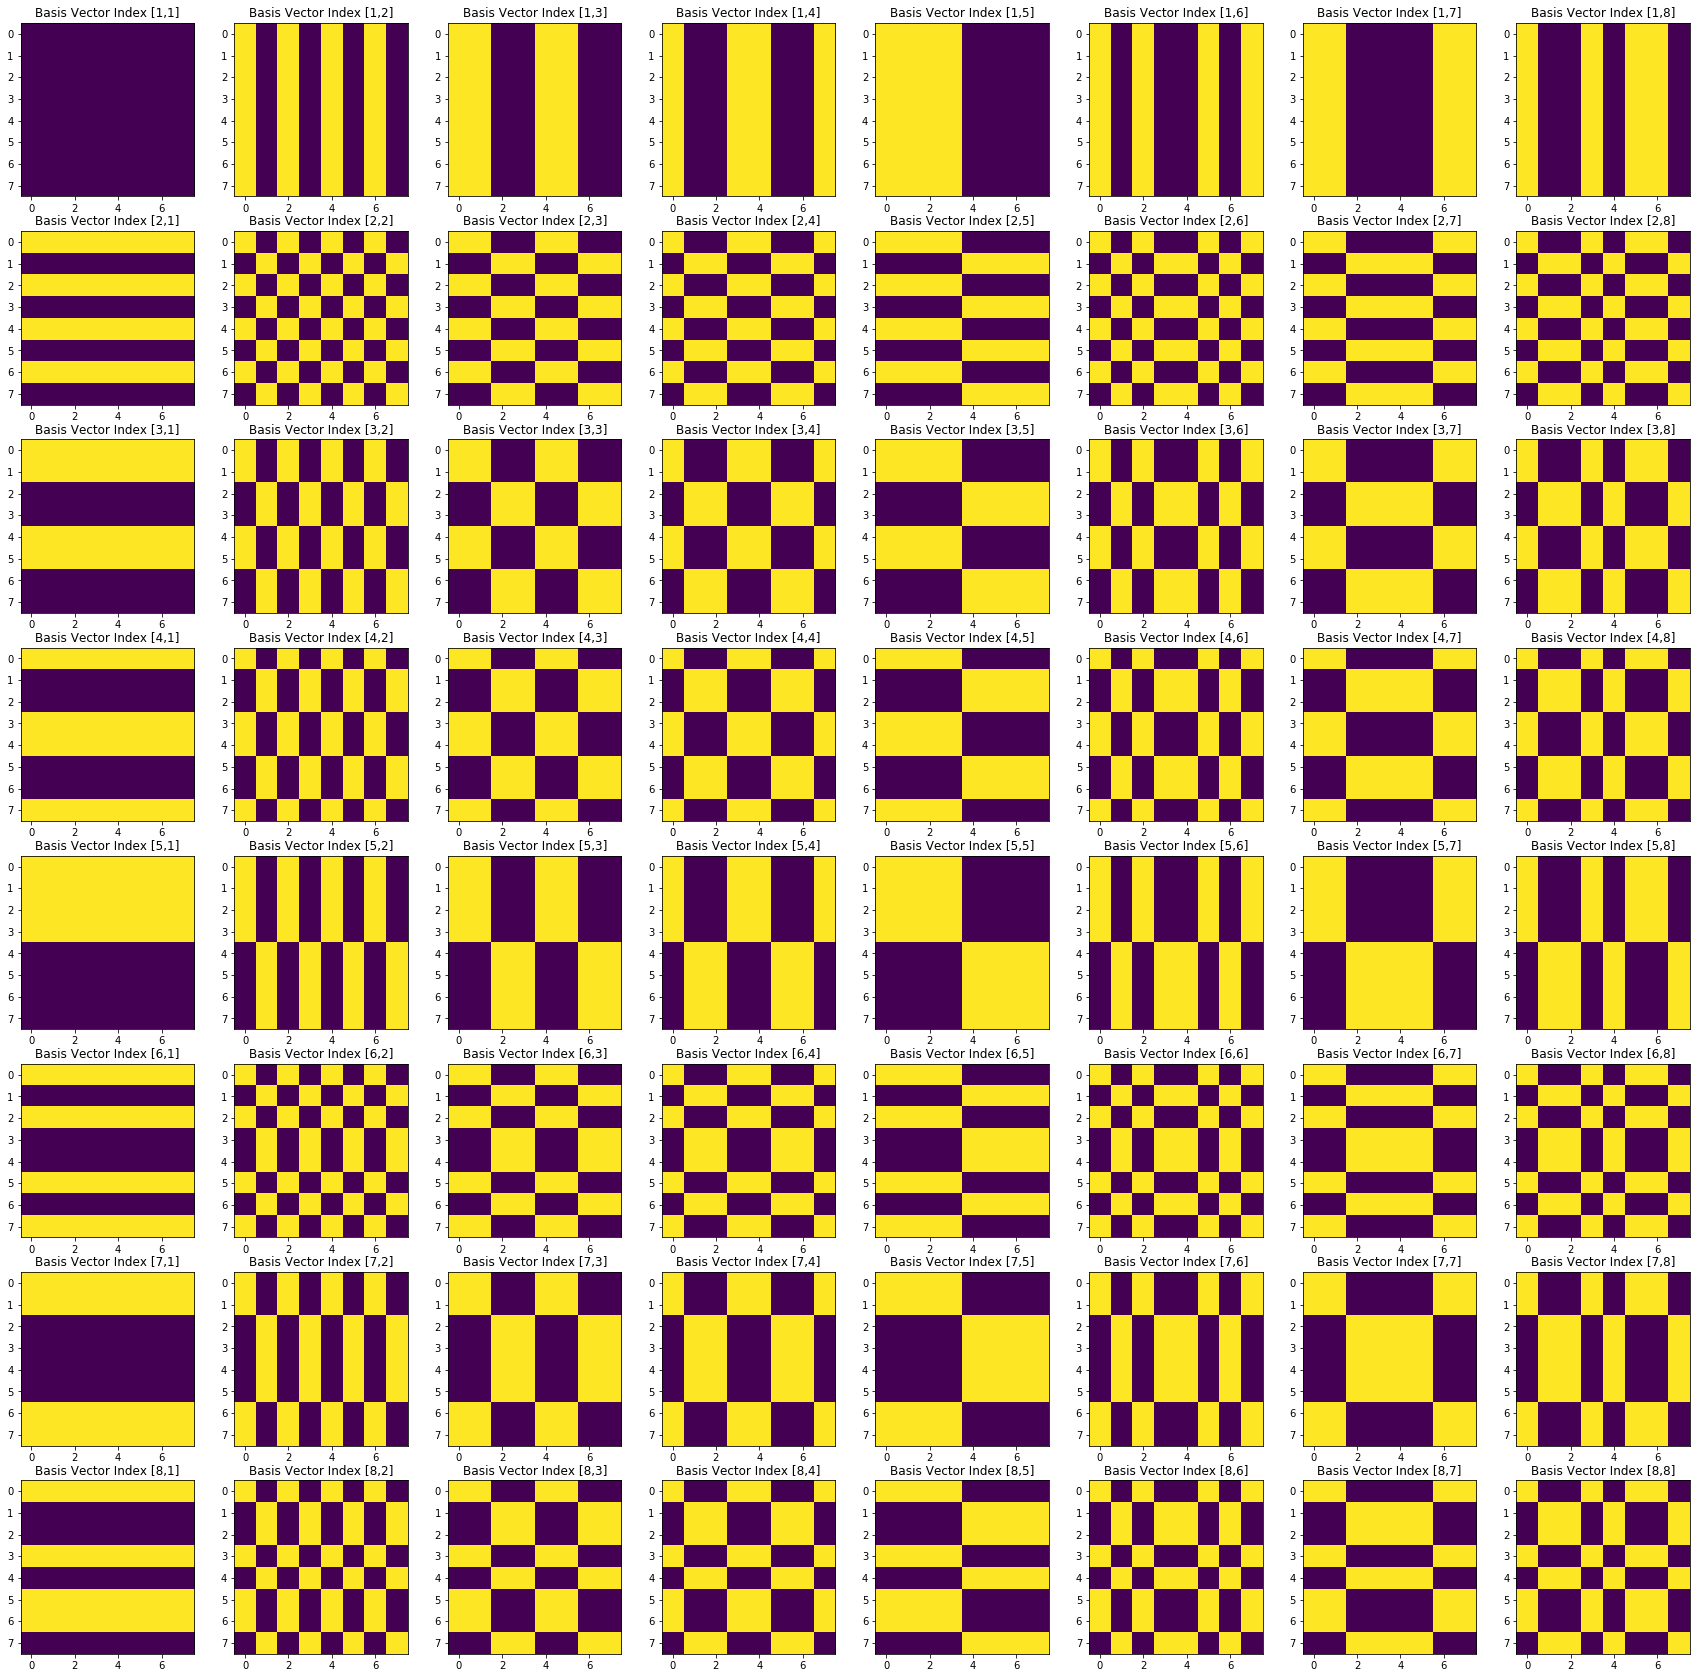

In [212]:
H = HadamardMtx(3)
plt.figure(figsize=(30,30))
for i in range(8):
    for j in range(8):
        basis_vec = np.zeros((8,8))
        basis_vec[i,j] = 1
        hadamard_basis_vec = H.dot(basis_vec).dot(H.T)#np.outer(B[:,i],B[:,j]) # 2D transform with 1D transform matrices
        plt.subplot(8,8,8*(i)+(j+1))
        plt.imshow(hadamard_basis_vec)
        plt.title("Basis Vector Index ["+str(i+1)+","+str(j+1)+"]")


## c

All Transformed matrices are the same! The last trial: 


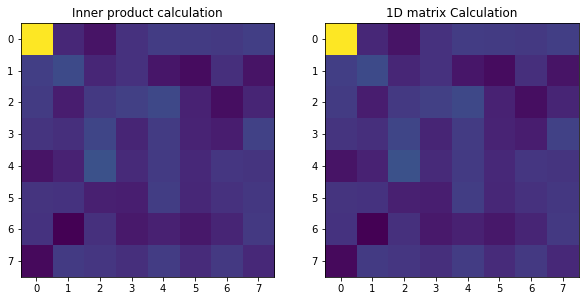

In [213]:
N = 3
for trial in range(50):
    H = HadamardMtx(N)
    T_inner_prod = np.zeros_like(H)
    I = np.random.randint(1,20,(2**N,2**N))
    for row in range(2**N):
        for col in range(2**N):
            basis_vec = np.zeros((2**N,2**N))
            basis_vec[row,col] = 1
            hadamard_basis_vec = H.dot(basis_vec).dot(H.T.conj())
            T_inner_prod[row,col] = np.trace(hadamard_basis_vec.conj().T.dot(I))
    T_mtx = H.dot(I).dot(H)
    assert np.all(np.isclose(T_mtx,T_inner_prod))
print("All Transformed matrices are the same! The last trial: ")
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(T_inner_prod)
plt.title("Inner product calculation")
plt.subplot(1,2,2)
plt.imshow(T_mtx)
plt.title("1D matrix Calculation");
    

        

# Q2

## a

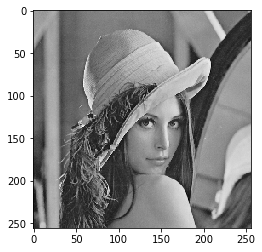

In [215]:
Lena = plt.imread("256by256grayscaleLena.png")
Lena = rgb2gray(Lena)
plt.imshow(Lena, cmap="gray")

## b

In [216]:
def zero_mean_cols(img):
    return (img.T - img.mean(axis=1)).T

def cov(img):
    if len(img.shape) == 1:
        return np.outer(img,img.conj())
    img = zero_mean_cols(img)
    return img.dot(img.T.conj())

def KLT_mtx(img):
    C_img = cov(img)
    w_vl = eig(C_img)
    return w_vl[1].T

def diagonal_coef_ratio(cov_mtx):
    cov_mtx = np.abs(cov_mtx)
    print("\nDiagonal Coefficients Value Ratio:",(np.trace(cov_mtx)) / np.sum(cov_mtx))


Diagonal Coefficients Value Ratio: 0.014061464


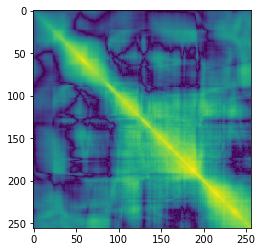

In [217]:
img = Lena
Cov_Lena = cov(img)
diagonal_coef_ratio((Cov_Lena))
plt.imshow(np.log(1+np.abs(Cov_Lena)))


Diagonal Coefficients Value Ratio: 0.1365569


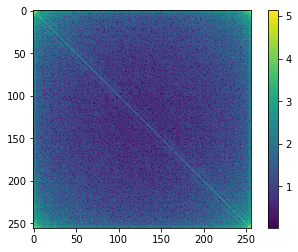

In [218]:
img = fft(Lena,axis=0)
Cov_Lena = np.abs(cov((img)))
diagonal_coef_ratio((Cov_Lena))
plt.imshow(np.log10(1+np.abs((Cov_Lena))))
plt.colorbar();


Diagonal Coefficients Value Ratio: 0.13431995


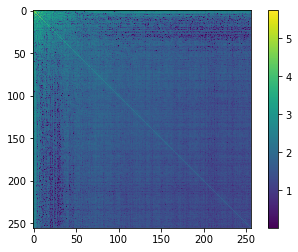

In [219]:
img = np.abs(dct(Lena,axis=0))

Cov_Lena = cov(img)
diagonal_coef_ratio(Cov_Lena)
plt.imshow(np.log10(1+np.abs(Cov_Lena)))
plt.colorbar();


Diagonal Coefficients Value Ratio: 0.9999802


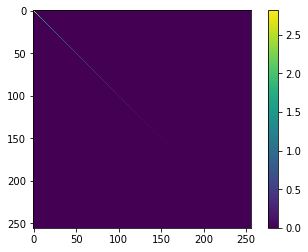

In [220]:
A = KLT_mtx(Lena)
img = A.dot(Lena)
Cov_Lena = cov(img)
diagonal_coef_ratio(Cov_Lena)
plt.imshow(np.log10(1+np.abs(Cov_Lena)))
plt.colorbar();

## c


Diagonal Coefficients Value Ratio: 0.003918582616188662


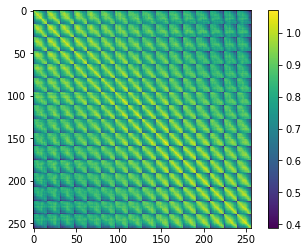

In [221]:
patch_size = 16
s1,_ = Lena.shape
num_horizontal = s1 // patch_size
num_vertical = num_horizontal
size = Lena.size
n_vectors = size // patch_size**2
step = s1 // patch_size
row_begin = 0
container = np.zeros((n_vectors,patch_size**2))
counter = 0
for row in range(patch_size):
    for col in range(patch_size):
        row_idx1 = row*patch_size
        row_idx2 = row*patch_size+step
        col_idx1 = col*patch_size
        col_idx2 = col*patch_size+step
        patch = Lena[row_idx1:row_idx2,col_idx1:col_idx2]
        container[:,counter] = patch.flatten()
        counter += 1
diagonal_coef_ratio(container)
plt.imshow(np.log10(1+np.abs(cov(container))))
plt.colorbar();
        

## d
### DCT 


Diagonal Coefficients Value Ratio: 0.003929736877422389


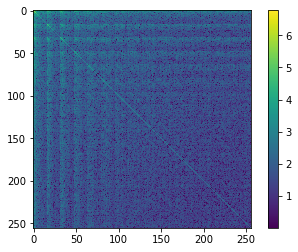

In [222]:
patch_size = 16
s1,_ = Lena.shape
num_horizontal = s1 // patch_size
num_vertical = num_horizontal
size = Lena.size
n_vectors = size // patch_size**2
step = s1 // patch_size
row_begin = 0
container = np.zeros((n_vectors,patch_size**2))
counter = 0
for row in range(patch_size):
    for col in range(patch_size):
        row_idx1 = row*patch_size
        row_idx2 = row*patch_size+step
        col_idx1 = col*patch_size
        col_idx2 = col*patch_size+step
        patch = Lena[row_idx1:row_idx2,col_idx1:col_idx2]
        patch = dctn(patch) # This transform is added
        container[:,counter] = patch.flatten()
        counter += 1
diagonal_coef_ratio(container)
plt.imshow(np.log10(1+np.abs(cov(container))))
plt.colorbar();

### DFT 


Diagonal Coefficients Value Ratio: 0.004121500439681202


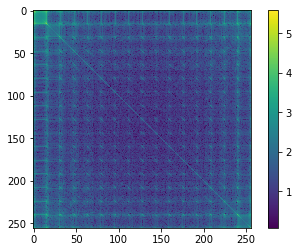

In [223]:
patch_size = 16
s1,_ = Lena.shape
num_horizontal = s1 // patch_size
num_vertical = num_horizontal
size = Lena.size
n_vectors = size // patch_size**2
step = s1 // patch_size
row_begin = 0
container = np.zeros((n_vectors,patch_size**2),dtype=complex)
counter = 0
for row in range(patch_size):
    for col in range(patch_size):
        row_idx1 = row*patch_size
        row_idx2 = row*patch_size+step
        col_idx1 = col*patch_size
        col_idx2 = col*patch_size+step
        patch = Lena[row_idx1:row_idx2,col_idx1:col_idx2]
        patch = fft2(patch) # This transform is added
        container[:,counter] = patch.flatten()
        counter += 1
diagonal_coef_ratio(container)
plt.imshow(np.log10(1+np.abs(cov(container))))
plt.colorbar();

## e
### KLT 


Diagonal Coefficients Value Ratio: 0.011069812


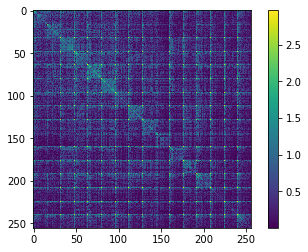

In [224]:
patch_size = 16
s1,_ = Lena.shape
num_horizontal = s1 // patch_size
num_vertical = num_horizontal
size = Lena.size
n_vectors = size // patch_size**2
step = s1 // patch_size
row_begin = 0
container = np.zeros((n_vectors,patch_size**2))
counter = 0
new_image = np.zeros_like(Lena)
for row in range(patch_size):
    for col in range(patch_size):
        row_idx1 = row*patch_size
        row_idx2 = row*patch_size+step
        col_idx1 = col*patch_size
        col_idx2 = col*patch_size+step
        patch = Lena[row_idx1:row_idx2,col_idx1:col_idx2]
        A = KLT_mtx(patch) # This transform is added
        KLT_transformed = A.dot(patch).dot(A.T)
        new_image[row_idx1:row_idx2,col_idx1:col_idx2] = KLT_transformed
plt.imshow(np.log10(1+np.abs(cov(new_image))))
diagonal_coef_ratio(new_image)
plt.colorbar();


# Q3

## a

Text(0.5, 0.98, 'Different Filter Responses for $D_0 = 40$')

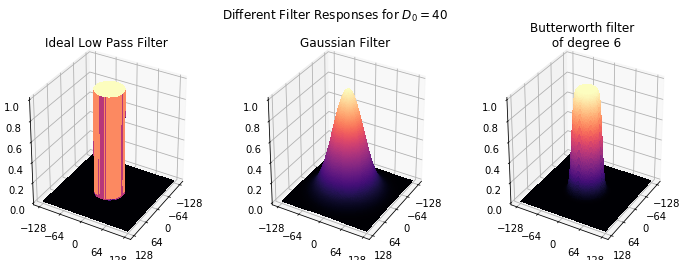

In [225]:
maxsize = 128
minsize = -1*maxsize

X = np.arange(minsize, maxsize, 1)
Y = np.arange(minsize, maxsize, 1)
X, Y = np.meshgrid(X, Y)
D = np.sqrt(X**2+Y**2)
D0 = 40
N_butterworth = 6
sigma_gaussian = D0

H_ideal = (D<D0) * np.ones_like(D)  
H_butterworth = 1 / (1 + (D/D0)**(2*N_butterworth))
H_gaussian = np.exp(-D*D/(2*sigma_gaussian**2))

# Plot the surface.
fig = plt.figure(figsize=plt.figaspect(.33))
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, H_ideal,rstride=1, 
    cstride=1, cmap=cm.magma, linewidth=0, antialiased=False)
ax.set_zlim(0,1)
ax.view_init(30, 30)
ax.set_xticks(np.linspace(-128,128,5))
ax.set_yticks(np.linspace(-128,128,5))
plt.title("Ideal Low Pass Filter")

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, H_gaussian,rstride=1, 
    cstride=1, cmap=cm.magma, linewidth=0, antialiased=False)
ax.set_zlim(0,1)
ax.view_init(30, 30)
ax.set_xticks(np.linspace(-128,128,5))
ax.set_yticks(np.linspace(-128,128,5))
plt.title("Gaussian Filter")

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, H_butterworth,rstride=1, 
    cstride=1, cmap=cm.magma, linewidth=0, antialiased=False)
ax.set_zlim(0,1)
ax.view_init(30, 30)
ax.set_xticks(np.linspace(-128,128,5))
ax.set_yticks(np.linspace(-128,128,5))
plt.title("Butterworth filter \n of degree "+str(N_butterworth))

plt.suptitle(r"Different Filter Responses for $D_0 = 40$")

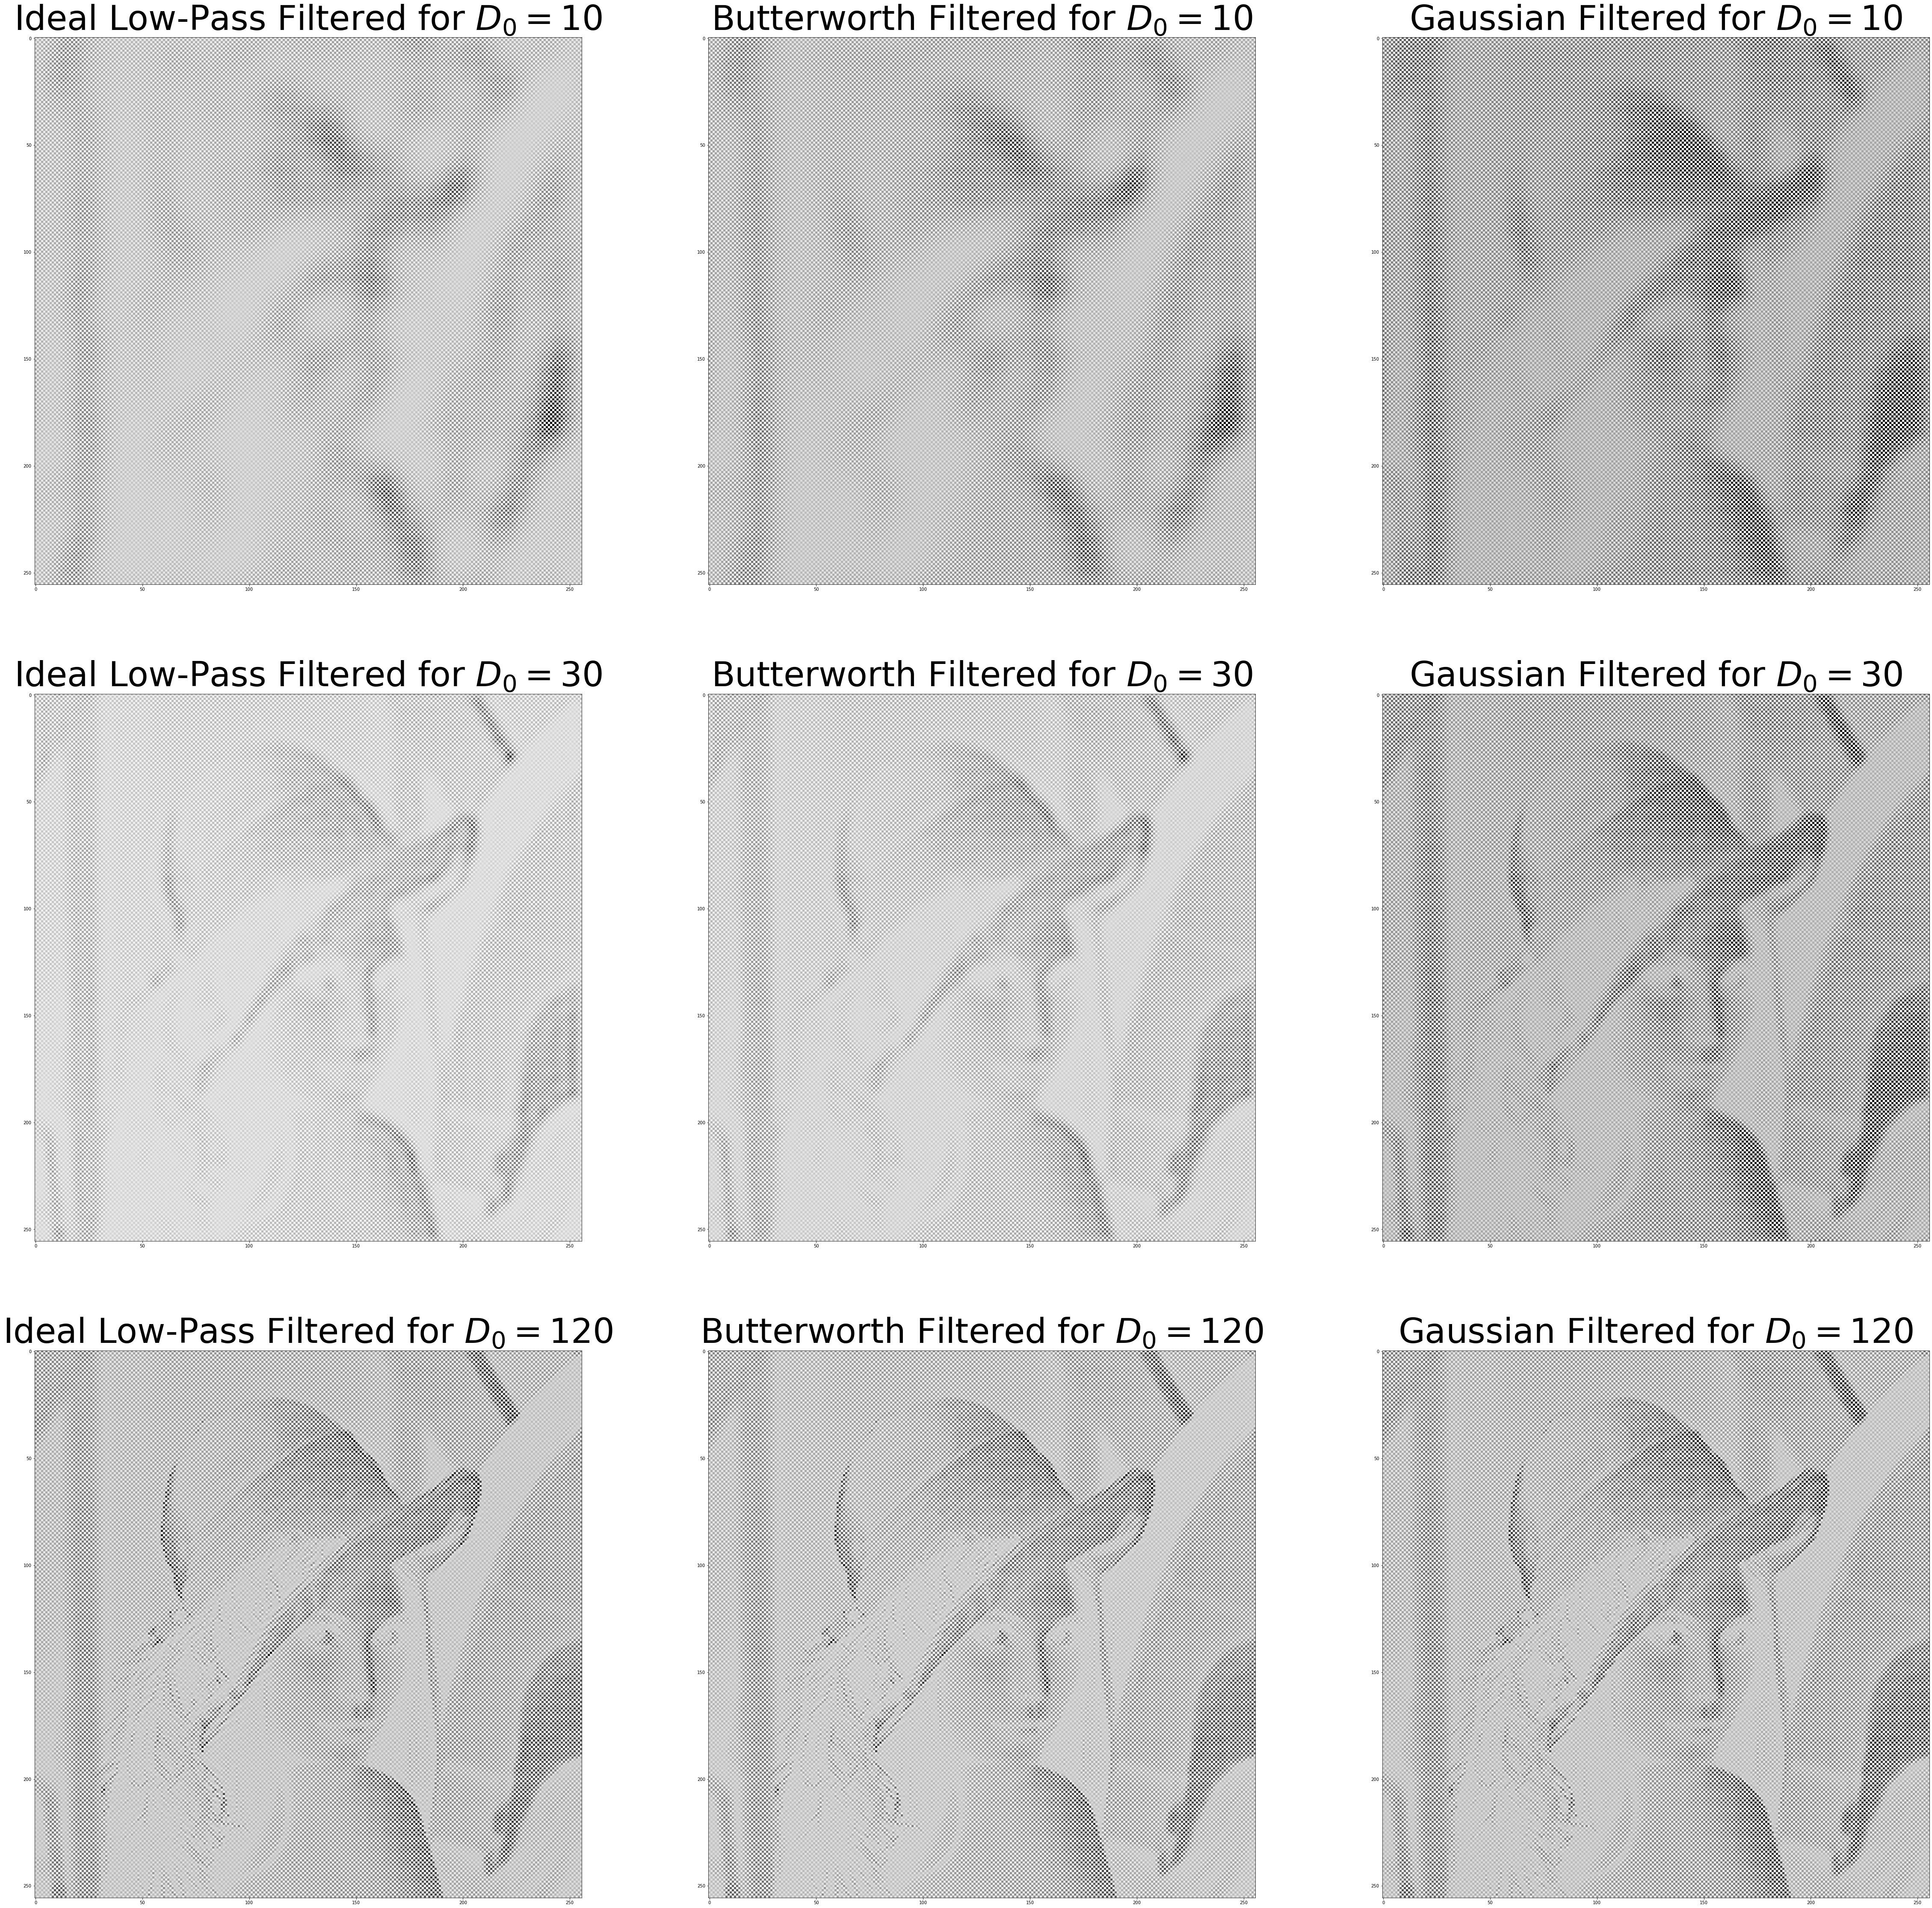

In [226]:
fig = plt.figure(figsize=(80,80))
fontsize = 80
for i,D0 in enumerate([10,30,120]):
    N_butterworth = 6
    sigma_gaussian = D0
    H_ideal = (D<D0) * np.ones_like(D)  
    H_butterworth = 1 / (1 + (D/D0)**(2*N_butterworth))
    H_gaussian = np.exp(-D*D/(2*sigma_gaussian**2))
    Lena_ideal = np.log10(1+np.real(ifft2(np.fft.fftshift(fft2(Lena))*H_ideal)))
    Lena_butterworth = np.log10(1+np.real(ifft2(np.fft.fftshift(fft2(Lena))*H_butterworth)))
    Lena_gaussian = np.log10(1+np.real(ifft2(np.fft.fftshift(fft2(Lena))*H_gaussian)))
    ax = fig.add_subplot(3, 3, (3*i+1))
    plt.imshow(Lena_ideal,cmap="gray")
    ax.set_title(r"Ideal Low-Pass Filtered for $D_0 = {}$".format(D0),fontsize=fontsize)

    ax = fig.add_subplot(3, 3, (3*i+2))
    plt.imshow(Lena_butterworth,cmap="gray")    
    ax.set_title(r"Butterworth Filtered for $D_0 = {}$".format(D0),fontsize=fontsize)

    ax = fig.add_subplot(3, 3, (3*i+3))
    plt.imshow(Lena_gaussian,cmap="gray")
    ax.set_title(r"Gaussian Filtered for $D_0 = {}$".format(D0),fontsize=fontsize)
    

    


# Q4

## a

In [227]:
%pip install PyWavelets
import pywt

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Diagonal')

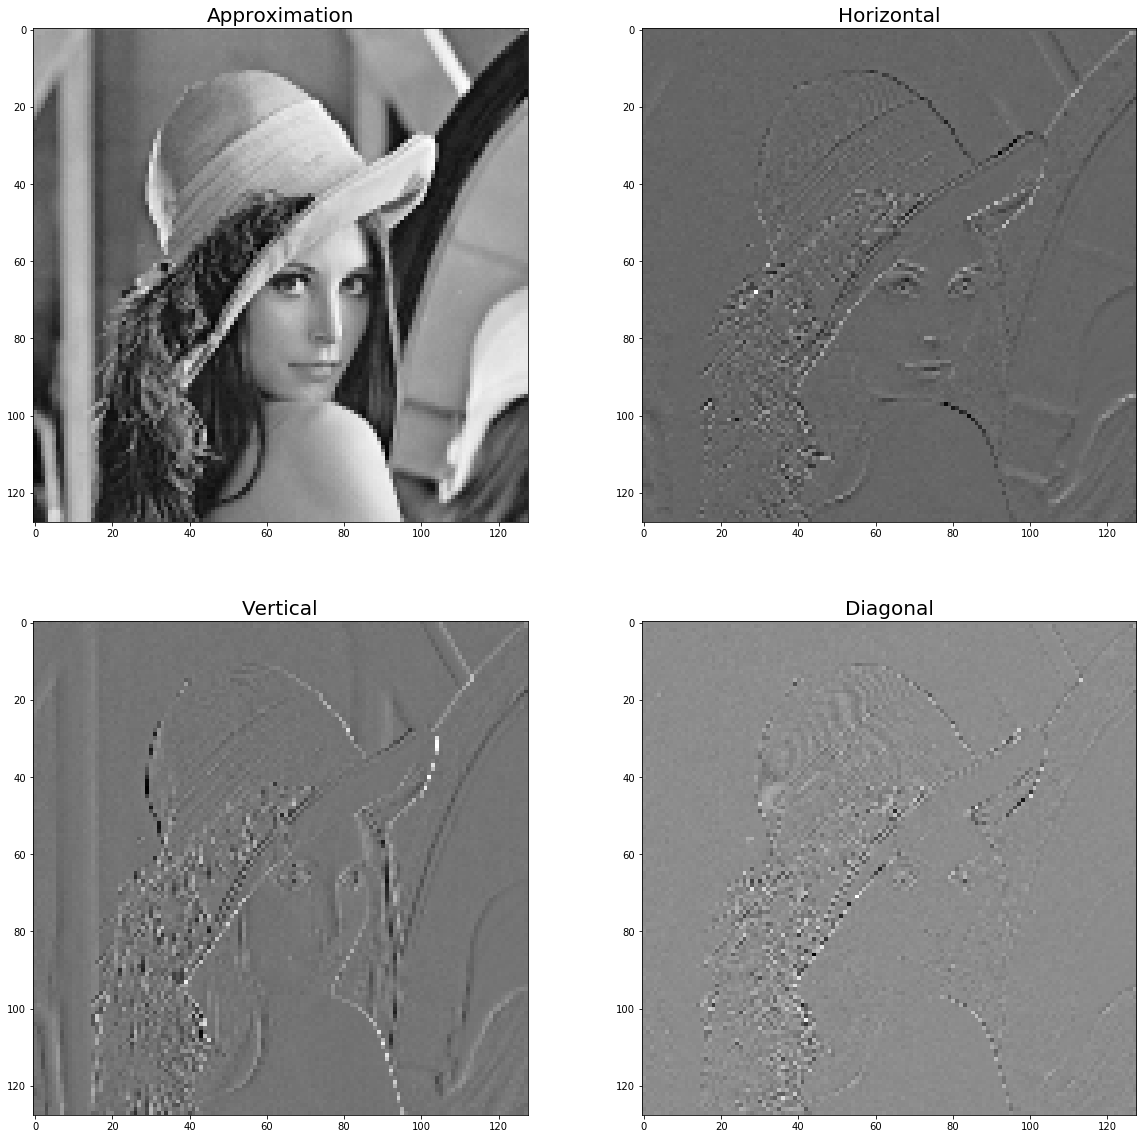

In [228]:
J1_coeffs = pywt.dwt2(Lena, "Haar", mode='symmetric', axes=(-2, -1))
cA, (cH, cV, cD) = J1_coeffs
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(cA,cmap="gray")
plt.title("Approximation",fontsize=20)
plt.subplot(2,2,2)
plt.imshow(cH,cmap="gray")
plt.title("Horizontal",fontsize=20)
plt.subplot(2,2,3)
plt.imshow(cV,cmap="gray")
plt.title("Vertical",fontsize=20)
plt.subplot(2,2,4)
plt.imshow(cD,cmap="gray")
plt.title("Diagonal",fontsize=20)




In [229]:
J2_coeffs = pywt.wavedec2(Lena, "Haar", mode='symmetric', level=2, axes=(-2, -1))

(cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)) = J2_coeffs


Text(0.5, 0.98, 'Level 1 Coefficients')

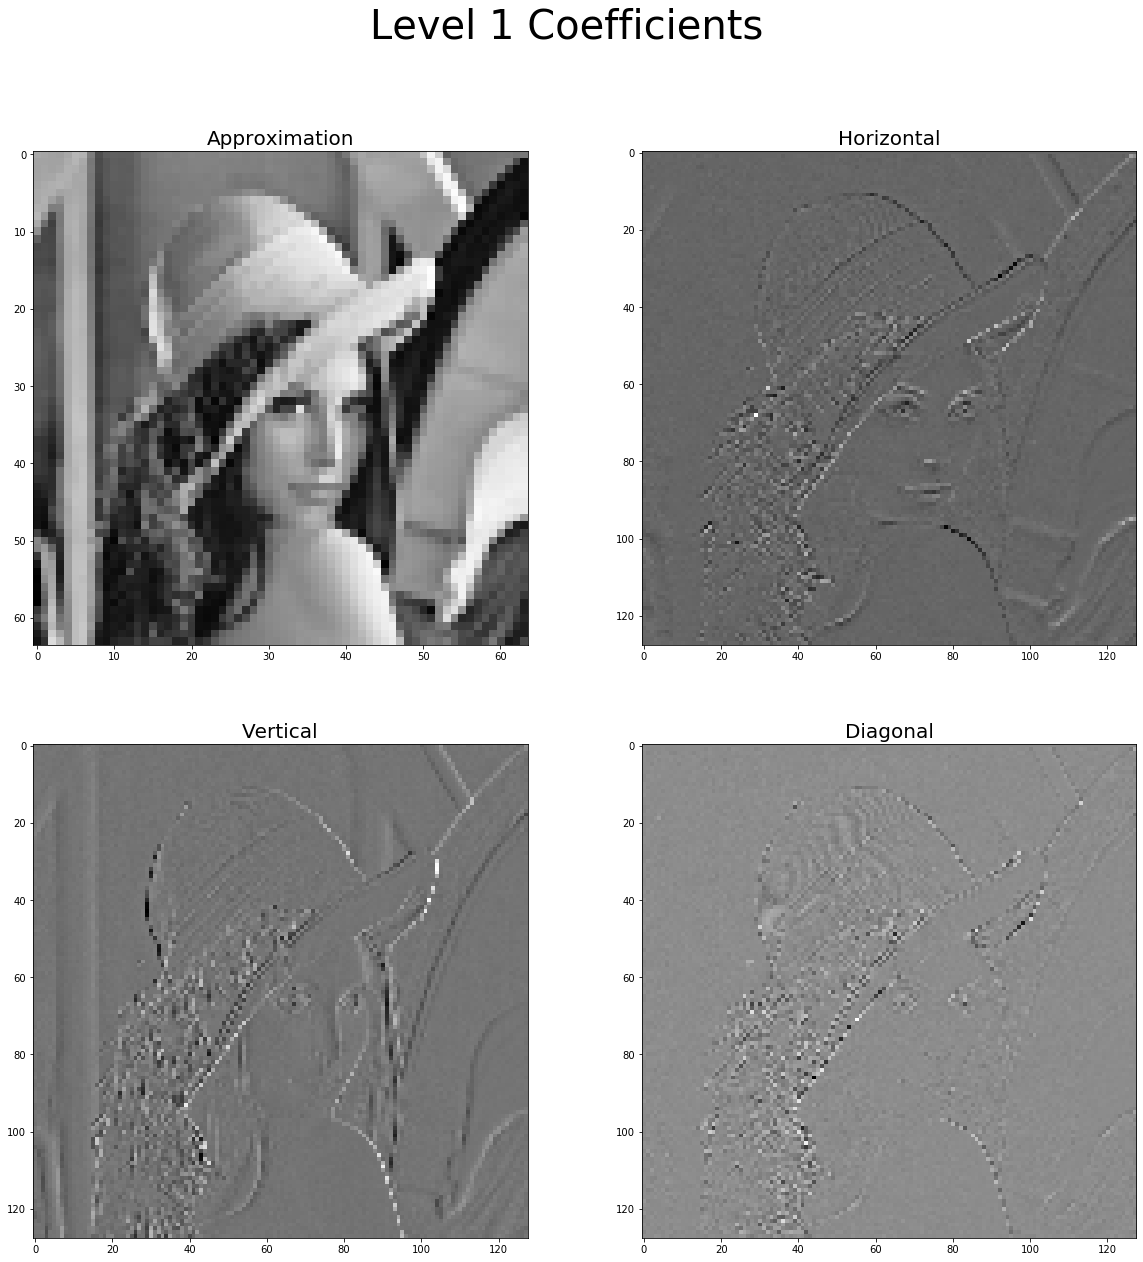

In [230]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(cA2,cmap="gray")
plt.title("Approximation",fontsize=20)
plt.subplot(2,2,2)
plt.imshow(cH1,cmap="gray")
plt.title("Horizontal",fontsize=20)
plt.subplot(2,2,3)
plt.imshow(cV1,cmap="gray")
plt.title("Vertical",fontsize=20)
plt.subplot(2,2,4)
plt.imshow(cD1,cmap="gray")
plt.title("Diagonal",fontsize=20)
plt.suptitle("Level 1 Coefficients",fontsize=40)


Text(0.5, 0.98, 'Level 2 Coefficients')

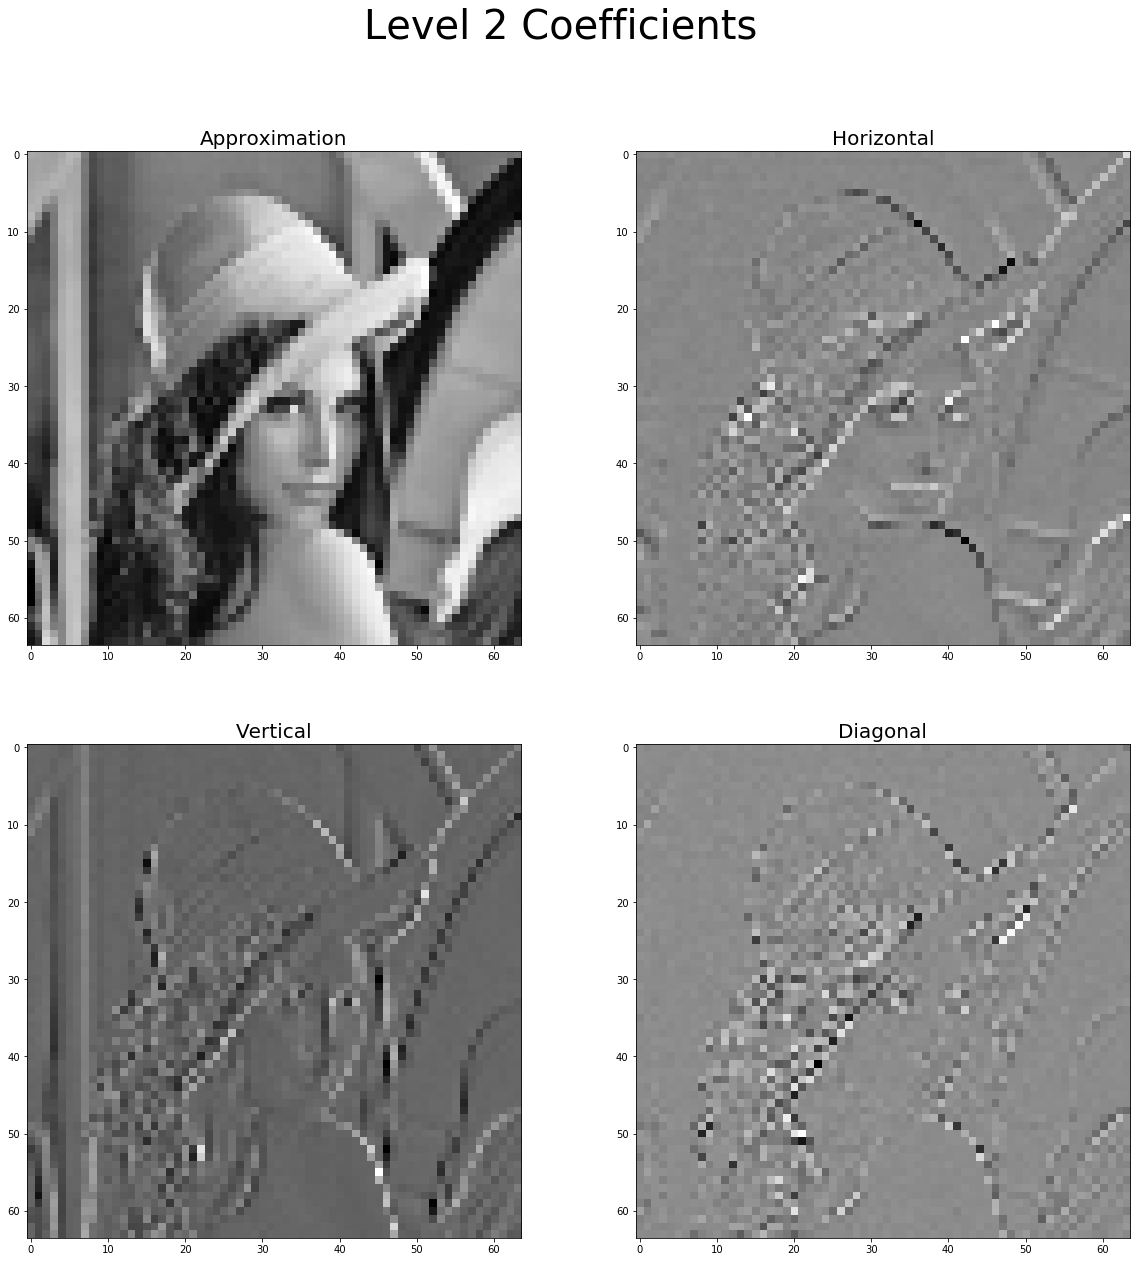

In [231]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(cA2,cmap="gray")
plt.title("Approximation",fontsize=20)
plt.subplot(2,2,2)
plt.imshow(cH2,cmap="gray")
plt.title("Horizontal",fontsize=20)
plt.subplot(2,2,3)
plt.imshow(cV2,cmap="gray")
plt.title("Vertical",fontsize=20)
plt.subplot(2,2,4)
plt.imshow(cD2,cmap="gray")
plt.title("Diagonal",fontsize=20)
plt.suptitle("Level 2 Coefficients",fontsize=40)


## c

In [232]:
s1,s2 = Lena.shape
Noisy_Lena = Lena + 0.2*np.random.randn(s1,s2)

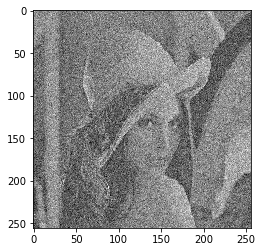

In [233]:
plt.imshow(Noisy_Lena,cmap="gray")

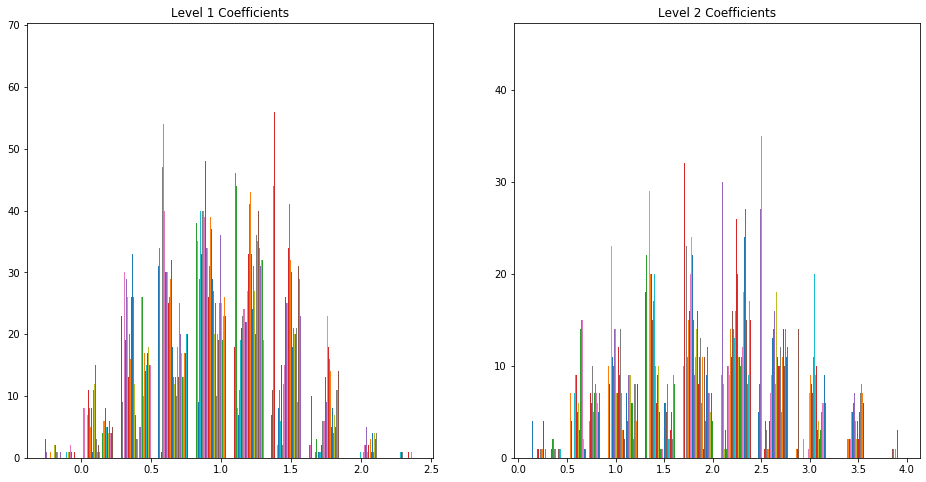

In [234]:
plt.figure(figsize=(16,8))
J2_coeffs = pywt.wavedec2(Noisy_Lena, "Haar", mode='symmetric', level=2, axes=(-2, -1))
(cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)) = J2_coeffs
J1_coeffs = pywt.dwt2(Noisy_Lena, "Haar", mode='symmetric', axes=(-2, -1))
cA, (cH, cV, cD) = J1_coeffs
plt.subplot(1,2,1)
plt.hist(cA);
# plt.xticks(np.arange(-1,3,0.25))
plt.title("Level 1 Coefficients")
plt.subplot(1,2,2)
plt.hist(cA2);
plt.title("Level 2 Coefficients");

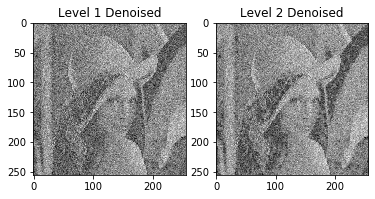

In [248]:
threshold1 = 0.23; threshold2 = 1
cA_filtered = np.where(((cA>threshold1)),cA,np.zeros_like(cA))
J1_coeffs_filtered = (cA_filtered, (cH, cV, cD))
cA2_filtered = np.where((cA2>threshold2) ,cA2,np.zeros_like(cA2))
J2_coeffs_filtered = (cA2_filtered, (cH2, cV2, cD2), (cH1, cV1, cD1))
LenaBack_J1 = pywt.waverec2(J1_coeffs_filtered, "Haar", mode='symmetric', axes=(-2, -1))
LenaBack_J2 = pywt.waverec2(J2_coeffs_filtered, "Haar", mode='symmetric', axes=(-2, -1))

plt.subplot(1,2,1)
plt.imshow(LenaBack_J1,cmap="gray")
plt.title("Level 1 Denoised")
plt.subplot(1,2,2)
plt.imshow(LenaBack_J2,cmap="gray")
plt.title("Level 2 Denoised");


In [249]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio
Lena_img = Lena.astype("float64")
ssim1 = structural_similarity(Lena_img,LenaBack_J1,);
psnr1 = peak_signal_noise_ratio(Lena_img,LenaBack_J1);
ssim2 = structural_similarity(Lena_img,LenaBack_J2);
psnr2 = peak_signal_noise_ratio(Lena_img,LenaBack_J2);
print("SSIM1 = ",str(ssim1),"| SSIM2 = ",str(ssim2))
print("PSNR1 = ",str(psnr1),"| PSNR2 = ",str(psnr2))


SSIM1 =  0.24959682782636297 | SSIM2 =  0.23648546298974255
PSNR1 =  13.890021302521 | PSNR2 =  13.348085555013963
